In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
import random

np.random.seed(29)  # For numpy numbers
random.seed(29)   # For Python

In [4]:
# Extract all image paths
def extract_file_paths(path):
    image_filenames = []
    for root, dirs, files in os.walk(path):
        if len(files) > 0:
            for file in files:
                if(file[-3:] == "tif" or file[-3:] == "Tif"):
                    image_filenames.append(str(root)+os.sep+str(file))
    print(len(image_filenames))
    return image_filenames

32000
advertisement
C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\advertisement\502100232+-0232.tif


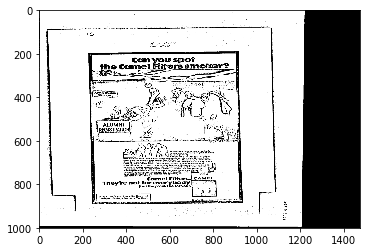

advertisement
C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\advertisement\502100595+-0595.tif


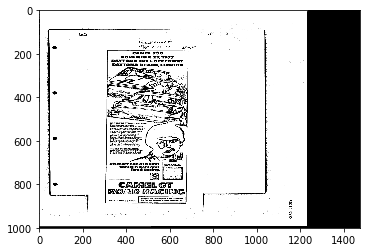

advertisement
C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\advertisement\502605734+-5734.tif


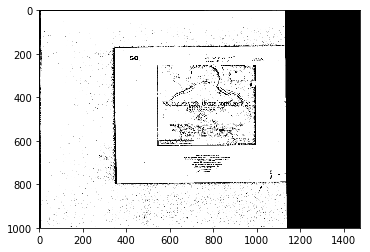

advertisement
C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\advertisement\502605779+-5779.tif


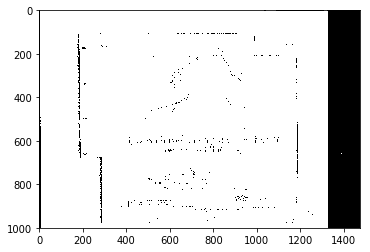

advertisement
C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\advertisement\502610456+-0460.tif


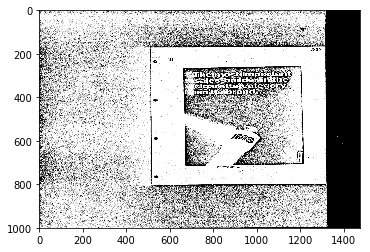

advertisement
C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\advertisement\502610716+-0716.tif


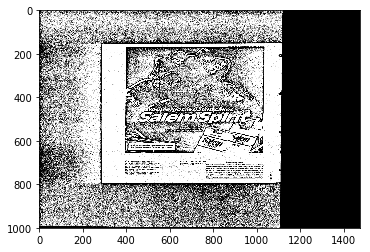

advertisement
C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\advertisement\502610793+-0793.tif


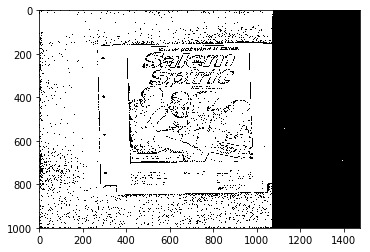

advertisement
C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\advertisement\502610858+-0858.tif


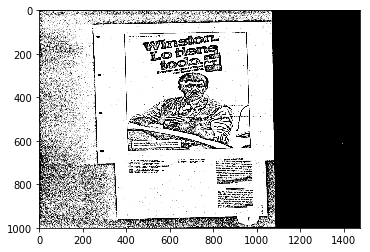

memo
C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\memo\2058088299.tif


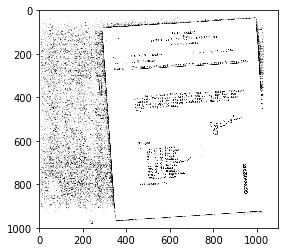

questionnaire
C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\questionnaire\1002481794_1799.tif


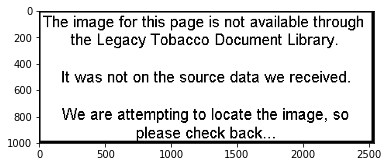

scientific report
C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train\scientific report\2058088387_2058088391.tif


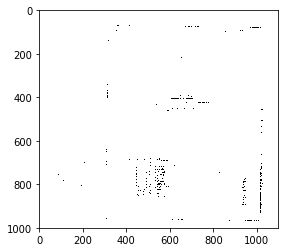

In [5]:
image_files = extract_file_paths("C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train")

#Get image dimensions
height = []
width = []
docs = []

for image in image_files:
    path = os.path.dirname(image)
    base = os.path.basename(path)
    docs.append(base)
    img = cv2.imread(image)
    height.append(img.shape[0])
    width.append(img.shape[1])
    #Print images wider than taller
    if img.shape[1] > 1000:
        print(base)
        print(image)
        plt.imshow(img)
        plt.show()

In [7]:
image_dim = {"Document": docs, "Height": height, "Width": width}
image_dim_df = pd.DataFrame(image_dim, columns = ["Document", "Height", "Width"])

In [8]:
image_dim_df.groupby('Document').quantile([0, 0.25, 0.5, 0.75, 1])  #Quantiles by class

Height   Width
Document                                   
advertisement          0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   762.0
                       0.75  1000.0   777.0
                       1.00  1000.0  1473.0
budget                 0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   766.0
                       0.75  1000.0   782.0
                       1.00  1000.0   869.0
email                  0.00  1000.0   754.0
                       0.25  1000.0   754.0
                       0.50  1000.0   754.0
                       0.75  1000.0   754.0
                       1.00  1000.0   802.0
file folder            0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   762.0
                       0.75  1000.0   777.0
                       1.00  1000.0   873.0
form                   0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   754.0
                       0.75  1000.0   777.0
                       1.00  1000.0   958.0
handwritten            0.00  1000.0   740.0
                       0.25  1000.0   754.0
                       0.50  1000.0   754.0
                       0.75  1000.0   771.0
                       1.00  1000.0   980.0
...                             ...     ...
presentation           0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   754.0
                       0.75  1000.0   777.0
                       1.00  1000.0   870.0
questionnaire          0.00  1000.0   607.0
                       0.25  1000.0   754.0
                       0.50  1000.0   762.0
                       0.75  1000.0   777.0
                       1.00  1000.0  2542.0
resume                 0.00  1000.0   731.0
                       0.25  1000.0   754.0
                       0.50  1000.0   754.0
                       0.75  1000.0   754.0
                       1.00  1000.0   820.0
scientific publication 0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   754.0
                       0.75  1000.0   772.0
                       1.00  1000.0   872.0
scientific report      0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   775.0
                       0.75  1000.0   777.0
                       1.00  1000.0  1096.0
specification          0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   775.0
                       0.75  1000.0   784.0
                       1.00  1000.0   901.0

[80 rows x 2 columns]

32000


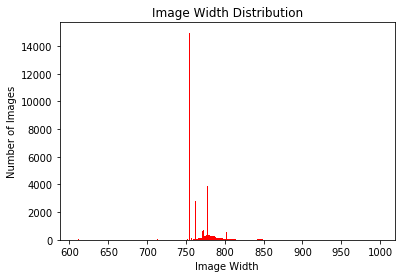

In [26]:
print(len(width))
width1 = [w for w in width if w <= 1000]
plt.hist(width, bins = range(min(width1), max(width1) + 1, 1), color = 'red')
#sns.distplot(width, hist=True, kde=True, bins=5, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
plt.title('Image Width Distribution')
plt.xlabel('Image Width')
plt.ylabel('Number of Images')
plt.show()

In [71]:
#Getting mean pixel value of each image

pixel_means = []

for image in image_files:
    img = cv2.imread(image)
    pixel_mean = np.mean(np.array(img))
    pixel_means.append(pixel_mean)

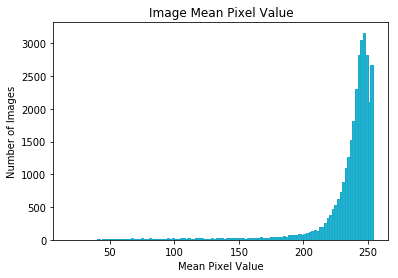

In [43]:
pixel_means_int = [int(x) for x in pixel_means]
plt.hist(pixel_means, bins = range(min(pixel_means_int), max(pixel_means_int) + 2, 2), color = '#21B1D1', edgecolor = '#1AA9C9')
plt.title('Image Mean Pixel Value')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Number of Images')
plt.show()

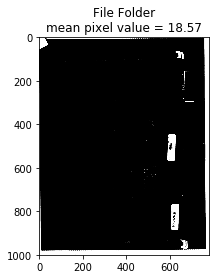

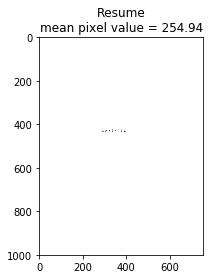

In [75]:
#Identifying the images with highest (whitest) and lowest (blackest) mean pixel values

max_index = pixel_means.index(max(pixel_means))
min_index = pixel_means.index(min(pixel_means))
max_image = image_files[max_index]
min_image = image_files[min_index]
max_img = cv2.imread(max_image, 0)
min_img = cv2.imread(min_image, 0)
max_path = os.path.dirname(max_image)
min_path = os.path.dirname(min_image)
max_doctype = max_path.split('\\')[1]
min_doctype = min_path.split('\\')[1]
plt.imshow(min_img, cmap = 'gray')
plt.title(min_doctype.title() + "\nmean pixel value = {}".format(min(pixel_means).round(2)))
plt.show()
plt.imshow(max_img, cmap = 'gray')
plt.title(max_doctype.title() + "\nmean pixel value = {}".format(max(pixel_means).round(2)))
plt.show()

In [92]:
#Creating images at half size of the previous for visual examination

full_image = cv2.imread('C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train/letter/0000116633.tif', 0)
height, width = full_image.shape
print(full_image.shape)
cv2.imwrite('C:/Users/sjcrum/Documents/Machine Learning II/Final Project/Report/Images/fullimage.tif', full_image)
half_image = cv2.resize(full_image, (int(width/2), int(height/2)))
print(half_image.shape)
cv2.imwrite('C:/Users/sjcrum/Documents/Machine Learning II/Final Project/Report/Images/halfimage.tif', half_image)
quarter_image = cv2.resize(full_image, (int(width/4), int(height/4)))
print(quarter_image.shape)
cv2.imwrite('C:/Users/sjcrum/Documents/Machine Learning II/Final Project/Report/Images/quarterimage.tif', quarter_image)
eighth_image = cv2.resize(full_image, (int(width/8), int(height/8)))
print(eighth_image.shape)
cv2.imwrite('C:/Users/sjcrum/Documents/Machine Learning II/Final Project/Report/Images/eighthimage.tif', eighth_image)
sixteenth_image = cv2.resize(full_image, (int(width/16), int(height/16)))
print(sixteenth_image.shape)
cv2.imwrite('C:/Users/sjcrum/Documents/Machine Learning II/Final Project/Report/Images/sixteenthimage.tif', sixteenth_image)

(1000, 762)
(500, 381)
(250, 190)
(125, 95)
(62, 47)


True

254